# 빅데이터 프로젝트

## 1. 스팀 게임 데이터 분석 준비

1. 데이터 준비 및 패키지 설치 & 로드

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*파일의 용량이 큰 관계로 구글드라이브에 압축파일 업로드 후 압축해제*

In [3]:
!unzip -qq "/content/drive/MyDrive/archive"

2. 데이터 확인

In [4]:
gm_data = pd.read_csv("/content/archive/games.csv") ## games.csv 파일
gm = gm_data.copy()

print(gm.head()) ## games.csv의 데이터 일부만 확인
gm.shape

   app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS™   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1       Positive              85            21         2.99            2.99   
2  Very Positive              92          3722        14.99           14.99   
3          Mixed              61           873        14.99           14.99   
4  Very Positive              88          8784        11.99           11.99   

   discount  steam_deck  
0       0.0 

(50796, 13)

In [5]:
usr_data = pd.read_csv("/content/archive/users.csv")  ## users.csv 파일
usr = usr_data.copy()

print(usr.head())

usr.shape

    user_id  products  reviews
0   7089523       359        0
1  13509147       156        1
2   8443010       329        4
3   4631165       176        3
4   4967668        98        2


(13784085, 3)

In [6]:
recommend_data = pd.read_csv("/content/archive/recommendations.csv")  ## recommendations.csv 파일
recommend = recommend_data.copy()

print(recommend.head())

recommend.shape

    app_id  helpful  funny        date  is_recommended  hours  user_id  \
0   975370        0      0  2022-12-12            True   36.3    49618   
1   304390        4      0  2017-02-17           False   11.5     2482   
2  1085660        2      0  2019-11-17            True  336.5   243365   
3   703080        0      0  2022-09-23            True   27.4   248653   
4   526870        0      0  2021-01-10            True    7.9    22898   

   review_id  
0          0  
1          1  
2          2  
3          3  
4          4  


(38347614, 8)

## 2. 연도 별 릴리즈된 게임의 수 증가확인


In [ ]:
# 'date_release' 열의 데이터 타입을 날짜로 변환
gm['date_release'] = pd.to_datetime(gm['date_release'])
# 'date_release' 열에서 연도 정보 추출
gm['release_year'] = gm['date_release'].dt.year

<Axes: xlabel='Year', ylabel='Number of Games Released'>

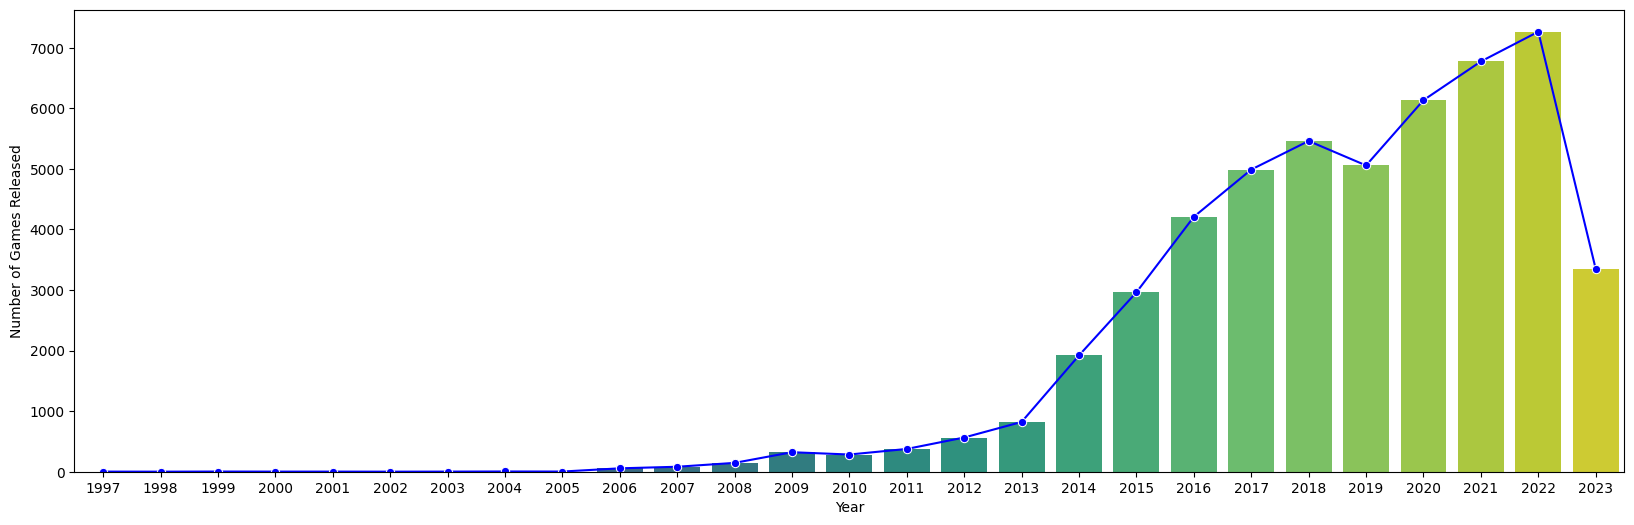

In [ ]:
# 각 연도별 게임 릴리스 수 계산
release_counts = gm['release_year'].value_counts().sort_index().reset_index()
release_counts.columns = ['Year', 'Number of Games Released']

# 'Year' 컬럼을 문자열로 변환
release_counts['Year'] = release_counts['Year'].astype(str)

# seaborn을 사용하여 선,막대 그래프로 표현
plt.figure(figsize=(20, 6))
sns.lineplot(data=release_counts, x='Year', y='Number of Games Released', marker='o', color='blue')
sns.barplot(data=release_counts, x='Year', y='Number of Games Released', palette='viridis')

## 3. 운영 체제 호환성 비교

In [ ]:
# 각 운영 체제별 호환되는 게임 수 계산
win_count = gm['win'].sum()
mac_count = gm['mac'].sum()
linux_count = gm['linux'].sum()

In [ ]:
# 파이 차트로 시각화
labels = ['Windows', 'Mac', 'Linux']
sizes = [win_count, mac_count, linux_count]
colors = ['#ff9999', '#66b3ff', '#99ff99']

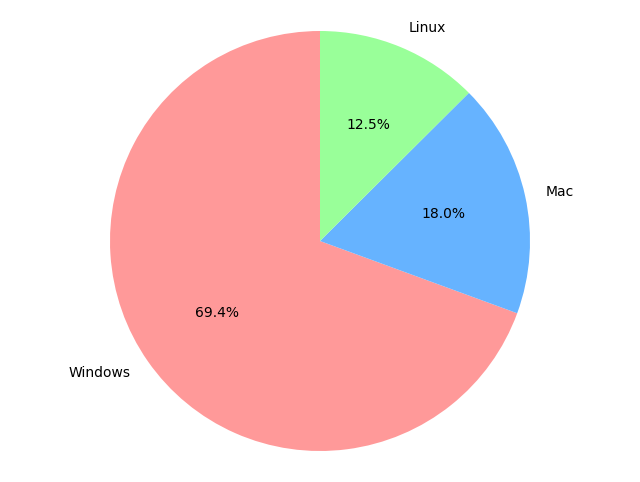

In [ ]:
# 파이차트로 구현
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 원형으로 출력
plt.show()

## 4. 할인율에 따른 가격 시각화


In [ ]:
# 할인율이 너무 많아서 구간을 나눠서 설정
bins = [-0.1, 0, 10, 25, 50, 75, 100]
labels = ['No Discount', '0-10%', '10-25%', '25-50%', '50-75%', '75-100%']

# 할인율을 구간에 맞게 레이블링
gm['discount_category'] = pd.cut(gm['discount'], bins=bins, labels=labels, right=False)

In [ ]:
# 가격 구간 설정
price_bins = [-np.inf, 10, 20, 30, 40, 50, 75, 100, np.inf]
price_labels = ['Less than 10', '10-20', '20-30', '30-40', '40-50', '50-75', '75-100', 'More than 100']

# price_final을 구간에 맞게 레이블링
gm['price_category'] = pd.cut(gm['price_final'], bins=price_bins, labels=price_labels, right=False)

<Axes: xlabel='discount_category', ylabel='price_category'>

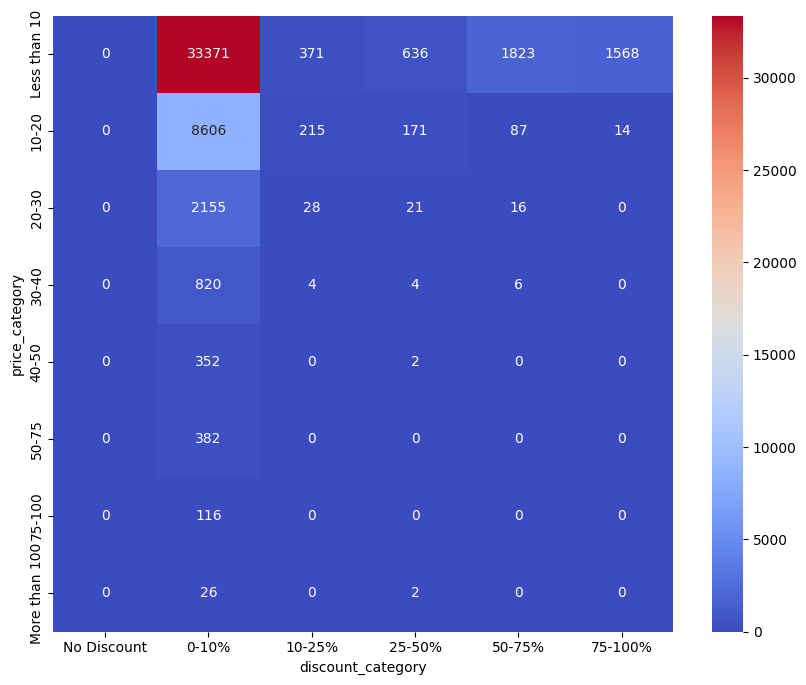

In [ ]:
# 피벗 테이블 생성
pivot_table = gm.pivot_table(index='price_category', columns='discount_category', aggfunc='size', fill_value=0)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm')

## 5. 스팀덱 호환성 여부

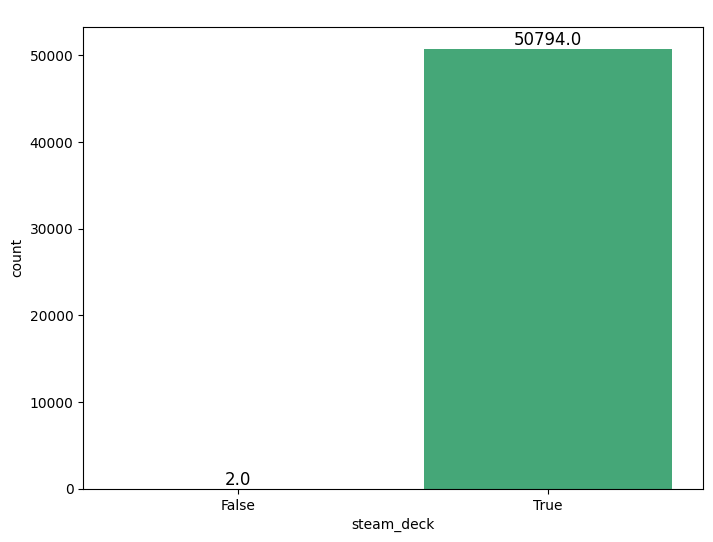

In [ ]:
# 스팀덱 호환성에 따른 게임 분포를 막대 그래프로 시각화
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=gm, x='steam_deck', palette='viridis')

# false의 양이 작아 그래프상에서 막대로 보이지 않아 막대위에 숫자로 표기
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', color='black', fontsize=12)

## 6. 가격 분포 시각화
x축: 최종 가격 (Price Final)

x축은 게임의 최종 가격을 나타냅니다. 여기서 최종 가격은 게임의 최종 판매 가격을 의미합니다. 히스토그램에서 x축은 데이터가 어떤 가격대에 분포하는지를 나타내며, 여러 구간으로 나누어진 가격대를 보여줍니다. 각 구간은 최종 가격이 속하는 범위를 의미합니다.

y축: 빈도수 (Frequency or Count)

y축은 각 가격대(또는 구간)에 속하는 데이터의 빈도수를 나타냅니다. 히스토그램의 막대 높이는 해당 가격대에 속하는 데이터(게임)의 개수를 표시합니다. 따라서 y축의 'count'는 해당 구간에 속하는 게임의 개수를 나타내며, 각 가격대의 데이터 분포를 시각적으로 보여줍니다.



Text(0, 0.5, 'Frequency')

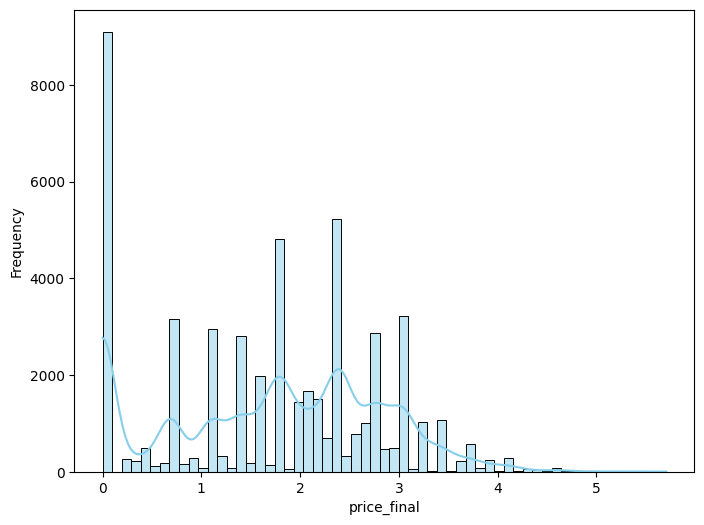

In [ ]:
# 최종 가격에 로그 스케일 적용하여 분포 시각화
plt.figure(figsize=(8, 6))
sns.histplot(np.log1p(gm['price_final']), kde=True, color='skyblue', edgecolor='black')

## 7. 리뷰어들의 추천게임 비율

recommendations.csv의 데이터를 처리할 때 서버가 다운될 정도로 많아
데이터셋에서 1/6정도만 추출하여 사용하였습니다.

In [ ]:
# 데이터셋에서 임의의 샘플 추출 (예: 1/6 크기)
sampled_recommend = recommend.sample(frac=1/6, random_state=42)
print(sampled_recommend)
print(sampled_recommend.shape)

           app_id  helpful  funny        date  is_recommended  hours  \
12772839   427520        0      0  2022-11-25            True  268.4   
36924736  1200860        7      3  2019-12-27            True    0.3   
36194094   377160        0      0  2021-03-05            True    9.9   
10573682    22380        0      0  2021-01-15            True  331.8   
3483570    438100       34     22  2021-06-07            True  212.4   
...           ...      ...    ...         ...             ...    ...   
19371812  1517290        0      0  2021-11-21            True   47.9   
32501368   335000        2      0  2020-01-03            True    6.3   
22511441   304930        2      0  2017-02-24            True  444.3   
29378799   245280        0      0  2021-04-17            True   10.9   
5297385    686810        0      0  2022-07-26            True   39.4   

           user_id  review_id  
12772839   7306906   12772839  
36924736    949861   36924736  
36194094   9021322   36194094  
1057368

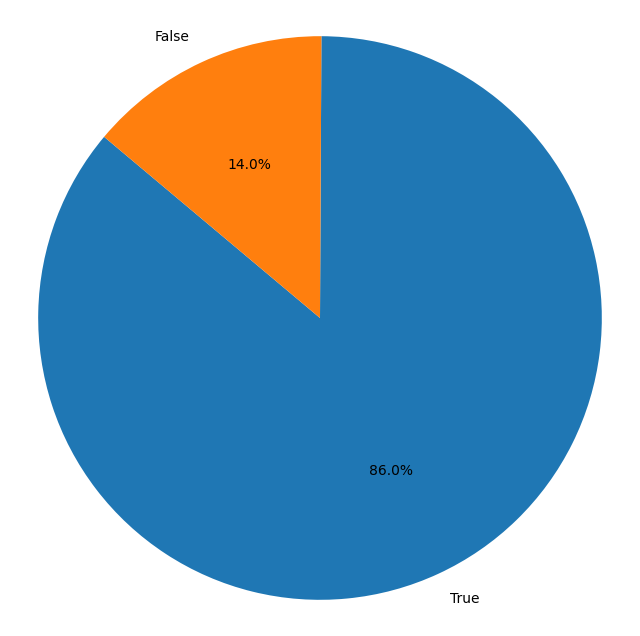

In [ ]:
recommended_counts = sampled_recommend['is_recommended'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(recommended_counts, labels=recommended_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

## 8. 유저별 활동과 리뷰 수 관계 분석
users.csv의 products와 reviews 간의 관계를 분석하여, 유저가 보유한 제품 수와 작성한 리뷰 수 사이의 관계를 나타냅니다.

<Axes: xlabel='products', ylabel='reviews'>

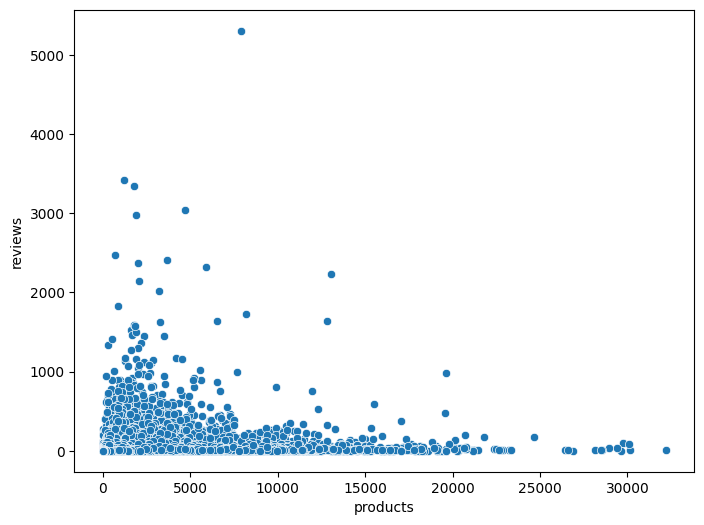

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=usr, x='products', y='reviews')

## 9. 리뷰가 많은 게임들의 추천 비율
리뷰가 많은 순서대로 상위 15개의 게임을 추출

recommendations.csv 데이터 1/10로 샘플링

In [14]:
chunks = pd.read_csv('/content/archive/recommendations.csv', chunksize=10000)
recommend_sample = pd.concat([chunk.sample(frac=0.1) for chunk in chunks])

games.csv, users.csv, recommendations.csv 데이터 머지

In [16]:
merged_data = pd.merge(recommend_sample, usr, on='user_id')
merged_data = pd.merge(merged_data, gm, on='app_id')

In [17]:
# app_id별 리뷰 수 계산
game_reviews = merged_data.groupby('app_id')['review_id'].count().reset_index(name='review_count')

리뷰가 많은 게임 상위 15개

In [19]:
# 리뷰가 많은 게임 상위 15개 추출
top_15_games = game_reviews.nlargest(15, 'review_count')

print(top_15_games)

        app_id  review_count
16         440         31837
1734    252490         26990
17693  1091500         22527
21         730         22082
19         570         21764
2509    292030         20437
6328    444090         20342
4746    377160         19639
4677    374320         19182
6057    431960         18965
4260    359550         18942
17610  1085660         18288
18         550         17933
1343    227300         17877
2186    275850         17286


In [40]:
top_15_games_title = pd.merge(top_15_games, gm[['app_id', 'title']], on='app_id')
top_15_games_title = pd.merge(top_15_games_title, recommend_sample, on='app_id')

print(top_15_games_title)

        app_id  review_count            title  helpful  funny        date  \
0          440         31837  Team Fortress 2        5      0  2014-04-24   
1          440         31837  Team Fortress 2        6      0  2014-08-18   
2          440         31837  Team Fortress 2        5      0  2017-01-11   
3          440         31837  Team Fortress 2       62      4  2017-11-27   
4          440         31837  Team Fortress 2       56     37  2021-03-15   
...        ...           ...              ...      ...    ...         ...   
314086  275850         17286     No Man's Sky        0      0  2021-11-24   
314087  275850         17286     No Man's Sky       15      3  2018-07-22   
314088  275850         17286     No Man's Sky        9      0  2022-08-01   
314089  275850         17286     No Man's Sky        0      0  2021-11-27   
314090  275850         17286     No Man's Sky        0      0  2022-06-02   

        is_recommended  hours   user_id  review_id  
0                 True

### 9-1 리뷰수가 많은 상위 15개의 게임의 is_recommended 수치

In [41]:
# 상위 15개 게임의 추천 수치 확인
top_15_games_with_recommendation = top_15_games_title.groupby('title')['is_recommended'].mean().reset_index(name='mean_is_recommended')
top_15_games_with_recommendation = top_15_games_with_recommendation.sort_values(by='mean_is_recommended', ascending=False)

print(top_15_games_with_recommendation)

                               title  mean_is_recommended
14                  Wallpaper Engine             0.982600
7                      Left 4 Dead 2             0.960185
5             Euro Truck Simulator 2             0.956984
12         The Witcher® 3: Wild Hunt             0.945393
2                    DARK SOULS™ III             0.928944
11                   Team Fortress 2             0.923140
0   Counter-Strike: Global Offensive             0.846753
9                          Paladins®             0.841068
10                              Rust             0.836236
13   Tom Clancy's Rainbow Six® Siege             0.819343
3                          Destiny 2             0.818132
6                          Fallout 4             0.814858
4                             Dota 2             0.790663
8                       No Man's Sky             0.775888
1                     Cyberpunk 2077             0.741688


<Axes: xlabel='mean_is_recommended', ylabel='title'>

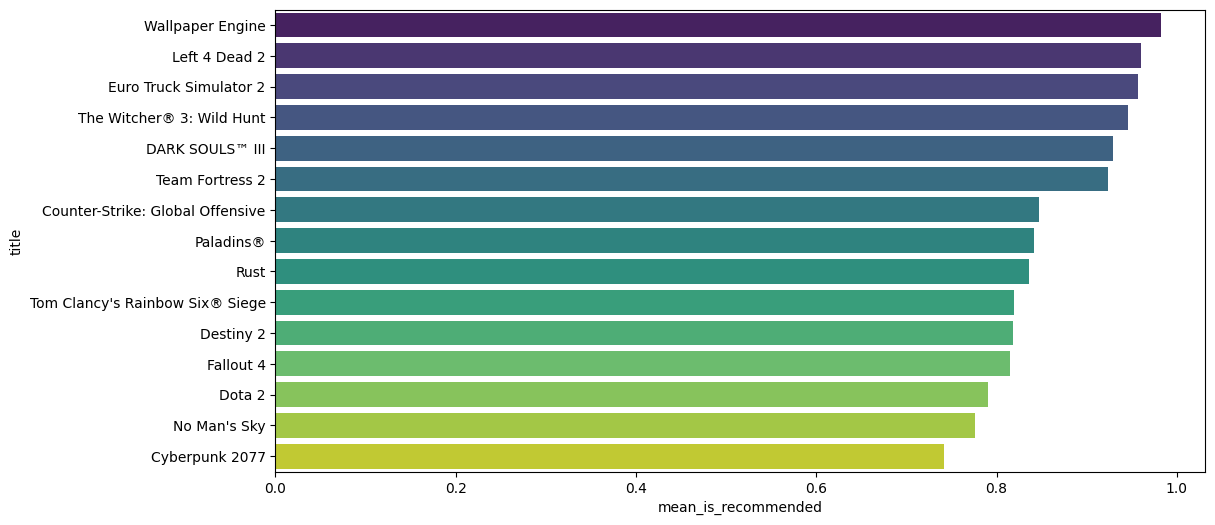

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_games_with_recommendation, x='mean_is_recommended', y='title', palette='viridis')


### 9-2 게임별 리뷰를 남긴 유저들의 플레이 시간 합
리뷰 수가 많은 상위 15개의 게임에 리뷰를 남긴 유저들의 각 플레이 시간을 합쳐
어느 게임이 가장 많이 플레이 되었는지 시각화합니다.

In [47]:
# 게임별로 리뷰를 남긴 유저들의 플레이 시간 계산
game_playtime = top_15_games_title.groupby('title')['hours'].sum().reset_index()
game_playtime = game_playtime.sort_values(by='hours', ascending=False)

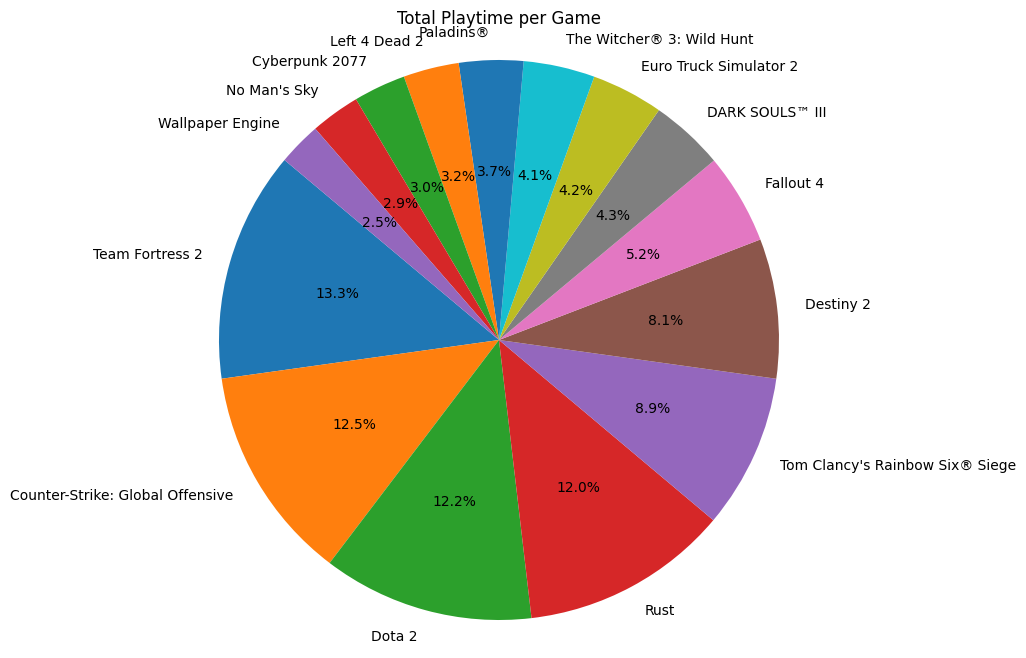

In [48]:
# 게임별 총 플레이 시간 파이 차트로 시각화
plt.figure(figsize=(10, 8))
plt.pie(game_playtime['hours'], labels=game_playtime['title'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Total Playtime per Game')
plt.show()

### 9-3 각 게임들의 연도별 리뷰수 추이

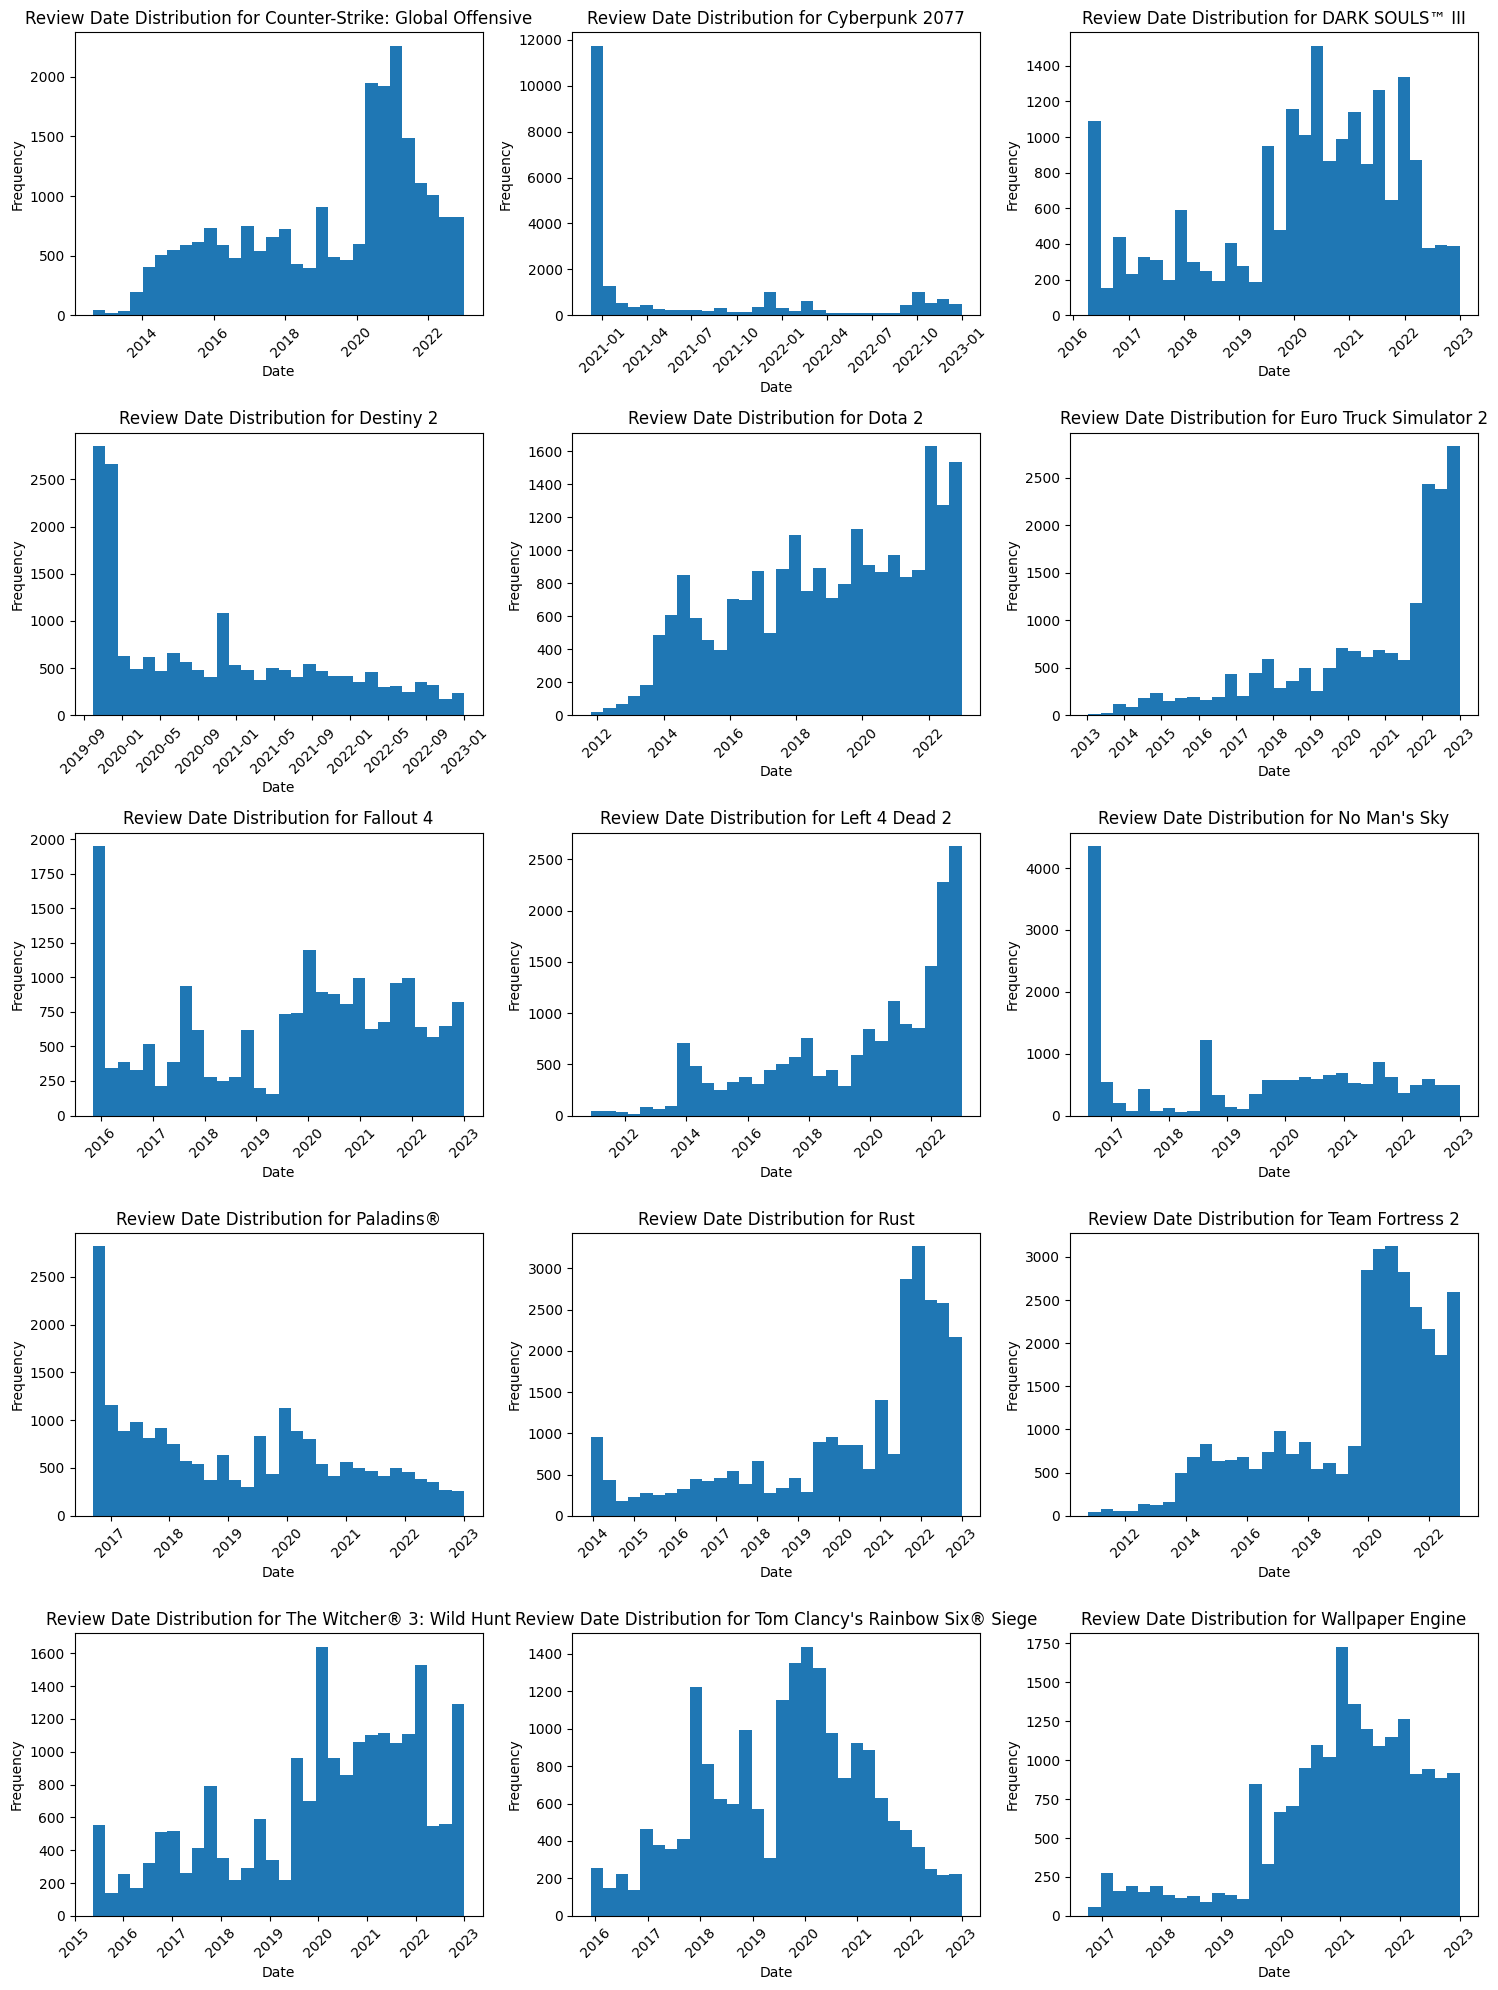

In [52]:
# top_15_games_title에서 각 게임별로 그래프 생성
fig, axs = plt.subplots(5, 3, figsize=(15, 20))

for idx, (game_title, data) in enumerate(top_15_games_title.groupby('title')):
    row = idx // 3
    col = idx % 3

    axs[row, col].hist(data['date'], bins=30)  #히스토그램 출력
    axs[row, col].set_title(f'Review Date Distribution for {game_title}')
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
